In [1]:
import pandas as pd
import numpy as np
import cv2
import os
from ultralytics import YOLO


image 1/1 C:\Users\Thiago\OneDrive\Documentos\Facul\TCC\facei-tcc-2023-grupo02\data\processed\outputs\102_original_predicted_1697920577.jpg: 384x640 1 person, 8 cars, 4 traffic lights, 138.6ms
Speed: 4.0ms preprocess, 138.6ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 C:\Users\Thiago\OneDrive\Documentos\Facul\TCC\facei-tcc-2023-grupo02\data\processed\outputs\102_original_predicted_1697920577.jpg: 384x640 1 person, 8 cars, 4 traffic lights, 114.7ms
Speed: 4.1ms preprocess, 114.7ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


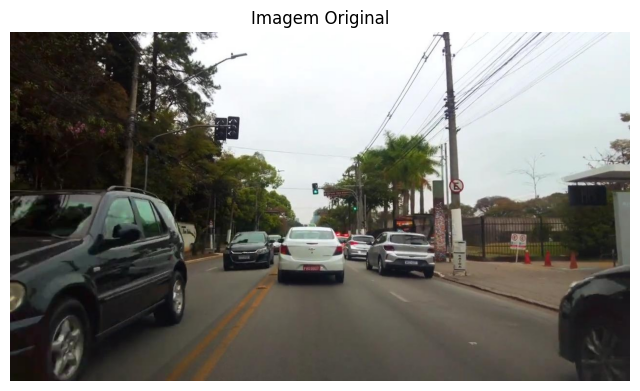

Confianças Modelo 1: {'Objeto 1 - car': 0.88, 'Objeto 2 - car': 0.88, 'Objeto 3 - car': 0.84, 'Objeto 4 - car': 0.82, 'Objeto 5 - car': 0.76, 'Objeto 6 - car': 0.74, 'Objeto 7 - traffic light': 0.65, 'Objeto 8 - traffic light': 0.55, 'Objeto 9 - traffic light': 0.5, 'Objeto 10 - car': 0.35, 'Objeto 11 - car': 0.31, 'Objeto 12 - traffic light': 0.28, 'Objeto 13 - person': 0.26}
Confianças Modelo 2: {'Objeto 1 - car': 0.88, 'Objeto 2 - car': 0.88, 'Objeto 3 - car': 0.84, 'Objeto 4 - car': 0.82, 'Objeto 5 - car': 0.76, 'Objeto 6 - car': 0.74, 'Objeto 7 - traffic light': 0.65, 'Objeto 8 - traffic light': 0.55, 'Objeto 9 - traffic light': 0.5, 'Objeto 10 - car': 0.35, 'Objeto 11 - car': 0.31, 'Objeto 12 - traffic light': 0.28, 'Objeto 13 - person': 0.26}


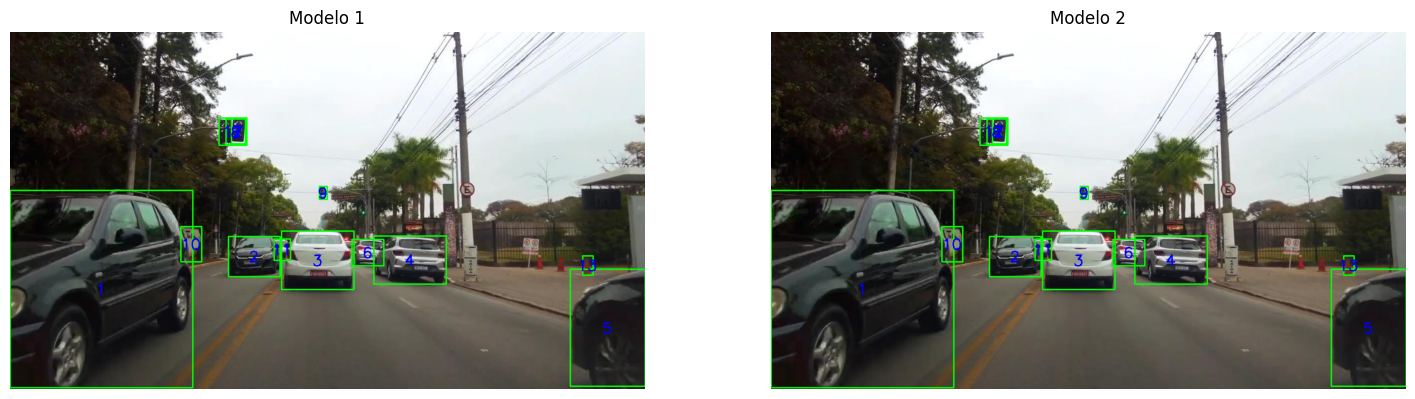

In [26]:
import os
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt

class PredPipe():
    def __init__(self, model1, model2):
        self.model1 = model1
        self.model2 = model2

    def predict_image(self, image_path):
        # Predict using the first YOLO model
        results1 = self.model1.predict(image_path)
        result1 = results1[0]
        
        # Predict using the second YOLO model
        results2 = self.model2.predict(image_path)
        result2 = results2[0]
        
        # Read the original image
        original_img = cv2.imread(image_path)
        
        # Read the image with detections for model 1
        img_with_detections1 = original_img.copy()
        
        # Desenhar boxes e números na imagem para o modelo 1
        for idx, box in enumerate(result1.boxes, start=1):
            class_id = result1.names[box.cls[0].item()]
            confidence = round(box.conf[0].item(), 2)
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            # Calcular as coordenadas do centro da caixa delimitadora
            x_center = (cords[0] + cords[2]) // 2
            y_center = (cords[1] + cords[3]) // 2
            # Calcular o tamanho do texto para centralizá-lo na caixa
            (text_width, text_height), _ = cv2.getTextSize(str(idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            text_x = x_center - text_width // 2
            text_y = y_center + text_height // 2
            # Desenhar o retângulo e o número do objeto
            cv2.rectangle(img_with_detections1, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
            cv2.putText(img_with_detections1, str(idx), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
        # Read the image with detections for model 2
        img_with_detections2 = original_img.copy()
        
        # Desenhar boxes e números na imagem para o modelo 2
        for idx, box in enumerate(result2.boxes, start=1):
            class_id = result2.names[box.cls[0].item()]
            confidence = round(box.conf[0].item(), 2)
            cords = box.xyxy[0].tolist()
            cords = [round(x) for x in cords]
            # Calcular as coordenadas do centro da caixa delimitadora
            x_center = (cords[0] + cords[2]) // 2
            y_center = (cords[1] + cords[3]) // 2
            # Calcular o tamanho do texto para centralizá-lo na caixa
            (text_width, text_height), _ = cv2.getTextSize(str(idx), cv2.FONT_HERSHEY_SIMPLEX, 1, 2)
            text_x = x_center - text_width // 2
            text_y = y_center + text_height // 2
            # Desenhar o retângulo e o número do objeto
            cv2.rectangle(img_with_detections2, (cords[0], cords[1]), (cords[2], cords[3]), (0, 255, 0), 2)
            cv2.putText(img_with_detections2, str(idx), (text_x, text_y), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
        
        # Exibir a imagem original
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB))
        plt.title('Imagem Original')
        plt.axis('off')
        plt.show()
        
        # Exibir as confianças dos modelos em formato de dicionário
        confidences1 = {f'Objeto {idx} - {result1.names[box.cls[0].item()]}': round(box.conf[0].item(), 2) for idx, box in enumerate(result1.boxes, start=1)}
        confidences2 = {f'Objeto {idx} - {result2.names[box.cls[0].item()]}': round(box.conf[0].item(), 2) for idx, box in enumerate(result2.boxes, start=1)}
        
        print("Confianças Modelo 1:", confidences1)
        print("Confianças Modelo 2:", confidences2)
        
        # Exibir as imagens com detecções dos modelos
        fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # Ajustando o tamanho das imagens dos modelos
        
        # Exibir a imagem com detecções do modelo 1
        axes[0].imshow(cv2.cvtColor(img_with_detections1, cv2.COLOR_BGR2RGB))
        axes[0].set_title('Modelo 1')
        axes[0].axis('off')
        
        # Exibir a imagem com detecções do modelo 2
        axes[1].imshow(cv2.cvtColor(img_with_detections2, cv2.COLOR_BGR2RGB))
        axes[1].set_title('Modelo 2')
        axes[1].axis('off')
        
        plt.show()

# Exemplo de uso:
model1 = YOLO()  # Inicialize seu primeiro modelo YOLO aqui
model2 = YOLO()  # Inicialize seu segundo modelo YOLO aqui
pipe = PredPipe(model1, model2)
image_path = "C:/Users/Thiago/OneDrive/Documentos/Facul/TCC/facei-tcc-2023-grupo02/data/processed/outputs/102_original_predicted_1697920577.jpg"
pipe.predict_image(image_path)
